In [2]:
import numpy as np 
import pandas as pd

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from pandas import DataFrame 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Input

import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import time

In [3]:
train = pd.read_csv("D:/Nour/Semester 7/Machine Learning/Project/fashion-mnist_train.csv")
test = pd.read_csv("D:/Nour/Semester 7/Machine Learning/Project/fashion-mnist_test.csv")

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.isnull().sum().sum()

0

In [6]:
test.isnull().sum().sum()

0

In [7]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]



In [8]:
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]


In [9]:

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')

X_train /= 255

In [11]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test = X_test.astype('float32')

X_test /= 255


In [12]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
X_test.shape

(10000, 28, 28, 1)

In [12]:
num_classes = 10
n_epochs = 25
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [13]:
# Creating a Sequential model, which is a linear stack of layers.
model = Sequential()

# Input layer with a shape of (28, 28, 1), representing a 28x28 grayscale image, and apply batch normalization to the input.
model.add(Input(shape=(28, 28, 1)))
model.add(BatchNormalization())

# Convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, ReLU activation, and strides of 1.
# Max pooling layer with a 2x2 pool size.
# Dropout layer with a rate of 30% to reduce overfitting.
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu',strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and ReLU activation.
# Max pooling layer with a 2x2 pool size.
# Dropout layer with a rate of 30% to reduce overfitting.
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Two consecutive convolutional layers with 128 filters, a 3x3 kernel, 'same' padding, ReLU activation, and strides of 1.
# Max pooling layer with a 2x2 pool size.
# Dropout layer with a rate of 30% to reduce overfitting.
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', strides=(1,1)))
model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', strides=(1,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Flatten the output to a 1D array for the fully connected layers.
model.add(Flatten())

# Fully connected layer with 64 neurons and ReLU activation.
# Dropout layer with a rate of 30% to reduce overfitting.
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer with 10 neurons and softmax activation for multi-class classification.
model.add(Dense(10, activation='softmax'))

In [14]:
# Compile the model using the Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric.
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:
# Training the model
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    restore_best_weights=True,
)

hist = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
375/375 [==============================] - 65s 165ms/step - loss: 0.7073 - accuracy: 0.7411 - val_loss: 0.9203 - val_accuracy: 0.6721
Epoch 2/100
375/375 [==============================] - 64s 169ms/step - loss: 0.4434 - accuracy: 0.8375 - val_loss: 0.3305 - val_accuracy: 0.8791
Epoch 3/100
375/375 [==============================] - 62s 167ms/step - loss: 0.3762 - accuracy: 0.8636 - val_loss: 0.2901 - val_accuracy: 0.8935
Epoch 4/100
375/375 [==============================] - 60s 160ms/step - loss: 0.3384 - accuracy: 0.8777 - val_loss: 0.2774 - val_accuracy: 0.8969
Epoch 5/100
375/375 [==============================] - 52s 140ms/step - loss: 0.3207 - accuracy: 0.8845 - val_loss: 0.2613 - val_accuracy: 0.9034
Epoch 6/100
375/375 [==============================] - 57s 152ms/step - loss: 0.3051 - accuracy: 0.8879 - val_loss: 0.2540 - val_accuracy: 0.9050
Epoch 7/100
375/375 [==============================] - 62s 165ms/step - loss: 0.2866 - accuracy: 0.8955 - val_loss: 0.2418 -

In [41]:
import math
score = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.2163 - accuracy: 0.9364
Test loss: 0.21632827818393707
Test accuracy: 0.9363999962806702


In [15]:
# Training the model with more epochs
hist2 = model.fit(X_train, y_train, epochs=150, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/150


375/375 [==============================] - 122s 275ms/step - loss: 0.6816 - accuracy: 0.7520 - val_loss: 0.8238 - val_accuracy: 0.7126
Epoch 2/150
375/375 [==============================] - 126s 335ms/step - loss: 0.4273 - accuracy: 0.8433 - val_loss: 0.3708 - val_accuracy: 0.8629
Epoch 3/150
375/375 [==============================] - 129s 345ms/step - loss: 0.3676 - accuracy: 0.8651 - val_loss: 0.2847 - val_accuracy: 0.8930
Epoch 4/150
375/375 [==============================] - 104s 278ms/step - loss: 0.3339 - accuracy: 0.8758 - val_loss: 0.2669 - val_accuracy: 0.8986
Epoch 5/150
375/375 [==============================] - 121s 323ms/step - loss: 0.3140 - accuracy: 0.8858 - val_loss: 0.2539 - val_accuracy: 0.9068
Epoch 6/150
375/375 [==============================] - 115s 308ms/step - loss: 0.2941 - accuracy: 0.8923 - val_loss: 0.2527 - val_accuracy: 0.9072
Epoch 7/150
375/375 [==============================] - 110s 293ms/step - loss: 0.2860 - accuracy: 0.8939 - val_loss:

NameError: name 'math' is not defined

In [16]:
import math
score1 = model.evaluate(X_test, y_test, steps=math.ceil(10000/32))
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

313/313 [==============================] - 5s 14ms/step - loss: 0.2293 - accuracy: 0.9381
Test loss: 0.22930817306041718
Test accuracy: 0.9380999803543091


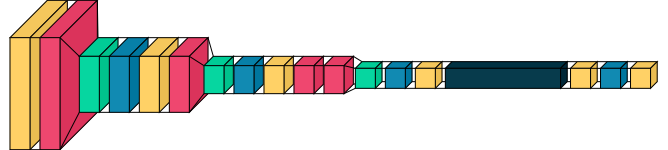

In [17]:
# Visualizing the CNN model architecture 
import visualkeras

visualkeras.layered_view(model)

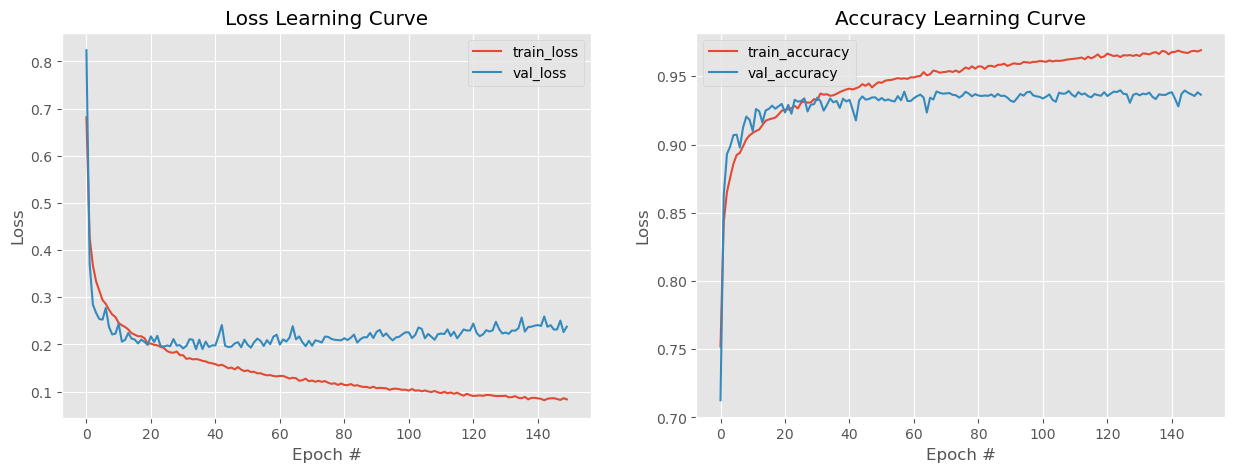

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(hist2.history['loss'], label='train_loss')
plt.plot(hist2.history['val_loss'], label='val_loss')
plt.title('Loss Learning Curve')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2) # index 2
plt.plot(hist2.history['accuracy'], label='train_accuracy')
plt.plot(hist2.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Learning Curve')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [30]:
# Displays the precision, recall, F1-score, and support for each class.
logits = model.predict(X_test, batch_size=128)
y_pred = np.argmax(logits, axis=1)
print(metrics.classification_report(y_test, y_pred, target_names = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']))

79/79 [==============================] - 3s 39ms/step
              precision    recall  f1-score   support

 T-shirt/Top       0.90      0.90      0.90      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.95      0.85      0.90      1000
       Dress       0.94      0.95      0.94      1000
        Coat       0.89      0.93      0.91      1000
      Sandal       1.00      0.98      0.99      1000
       Shirt       0.80      0.84      0.82      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle Boot       0.98      0.97      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



We can see from this classification report that the classification for Shirt, which is the most misclassified class, has improved from the other two models

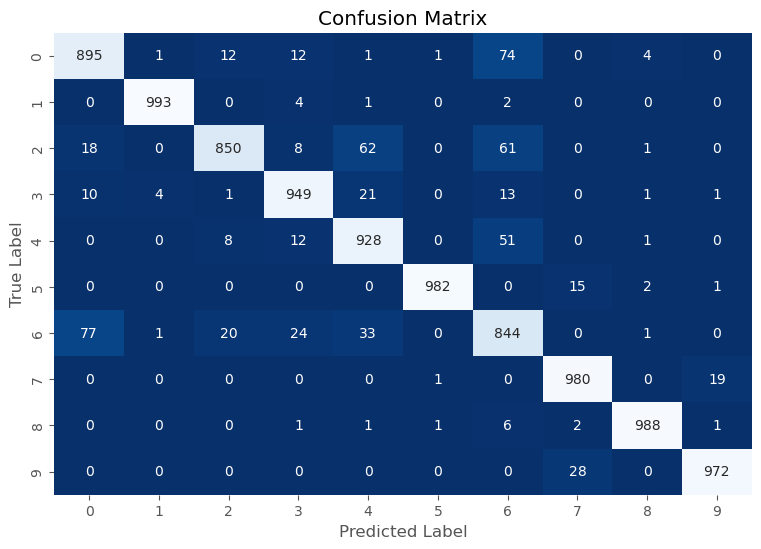

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues_r", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The misclassifications of class Shirt here sum up to about 150 as opposed to 250 in our SVM model. This is due to the higher accuracy we get in this SVM model

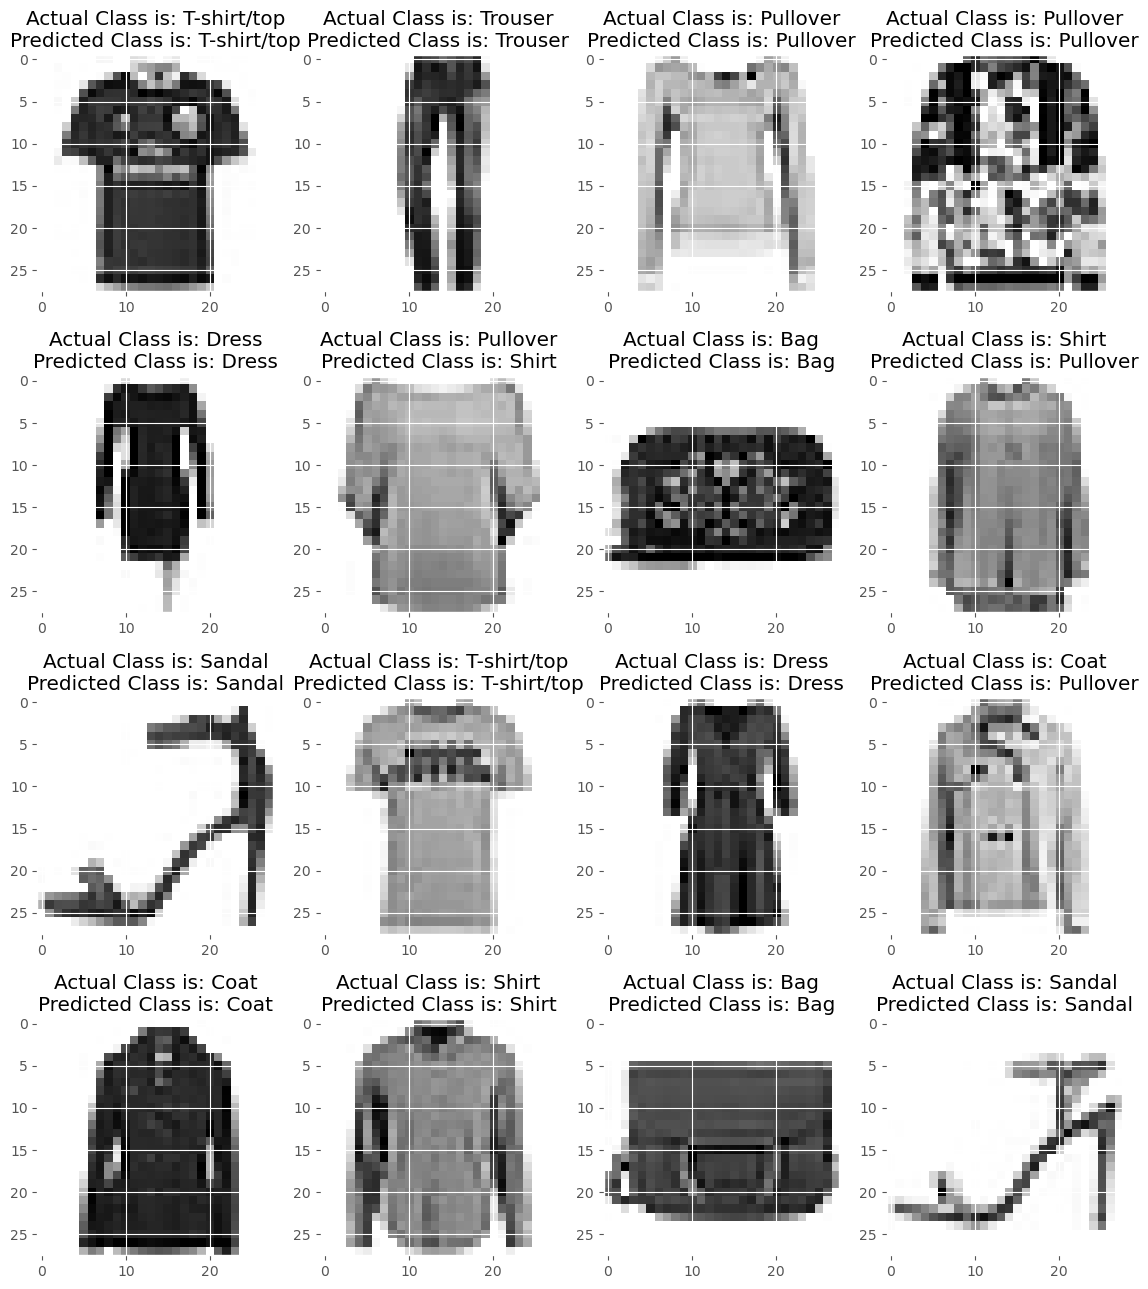

In [28]:
# Helps in visualizing some of the actual image and the predicted using our chosen model
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

X_test1 = np.array(X_test).reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(14, 16))
for i, ax in enumerate(axis.flat):
    ax.imshow(np.array(X_test1[i]).reshape((28,28)), cmap='binary')
    ax.set(title = f"Actual Class is: {labels[y_test[i]]}\nPredicted Class is: {labels[y_pred[i]]}")

From the few images we see here, we can see that image 3 is now correctly classified by the CNN model.